# **GLOBAL TERRORISM**

---



---



In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# importing drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing dataset
global_terrorism=pd.read_csv("/content/drive/MyDrive/colab files/Global Terrorism Data.csv",encoding = 'latin')

In [ ]:
#looking first 5 rows
global_terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# looking last 5 rows
global_terrorism.tail()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


Data **Cleaning**

In [ ]:
#Renaming the columns
global_terrorism.rename(columns={'iyear':'Year','imonth':'Month','city':'City',
                   'iday':'Day','country':'Country_Code','country_txt':'Country_Name','region':'No_of_regions','region_txt':'Region',
                   'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                   'nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                   'motive':'Motive'},inplace=True)

There are so many Null values column so we will be considering only important columns

In [ ]:
#Introducing new column i.e Casualities
global_terrorism['Casualties'] = global_terrorism.Killed + global_terrorism.Wounded
global_terrorism=global_terrorism[['eventid','Year','Month','Day','Country_Code','Country_Name','extended','resolution','No_of_regions','Region','provstate','City','latitude',
                             'longitude','success','AttackType','Killed','Wounded','Casualties',
                             'Target','Group','Target_type','Weapon_type','ishostkid','Summary']]

In [ ]:
global_terrorism.shape

(181691, 25)

**Understanding DataSet**





In [ ]:
global_terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventid        181691 non-null  int64  
 1   Year           181691 non-null  int64  
 2   Month          181691 non-null  int64  
 3   Day            181691 non-null  int64  
 4   Country_Code   181691 non-null  int64  
 5   Country_Name   181691 non-null  object 
 6   extended       181691 non-null  int64  
 7   resolution     2220 non-null    object 
 8   No_of_regions  181691 non-null  int64  
 9   Region         181691 non-null  object 
 10  provstate      181270 non-null  object 
 11  City           181257 non-null  object 
 12  latitude       177135 non-null  float64
 13  longitude      177134 non-null  float64
 14  success        181691 non-null  int64  
 15  AttackType     181691 non-null  object 
 16  Killed         171378 non-null  float64
 17  Wounded        165380 non-nul

In [ ]:
global_terrorism.dtypes

eventid            int64
Year               int64
Month              int64
Day                int64
Country_Code       int64
Country_Name      object
extended           int64
resolution        object
No_of_regions      int64
Region            object
provstate         object
City              object
latitude         float64
longitude        float64
success            int64
AttackType        object
Killed           float64
Wounded          float64
Casualties       float64
Target            object
Group             object
Target_type       object
Weapon_type       object
ishostkid        float64
Summary           object
dtype: object

In [ ]:
global_terrorism.describe()

,eventid,Year,Month,Day,Country_Code,extended,No_of_regions,latitude,longitude,success,Killed,Wounded,Casualties,ishostkid
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000,164817.000000,181513.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,131.968501,0.045346,7.160938,23.498343,-4.586957e+02,0.889598,2.403272,3.167668,5.296128,0.059054
std,1.325957e+09,13.259430,3.388303,8.814045,112.414535,0.208063,2.933408,18.569242,2.047790e+05,0.313391,11.545741,35.949392,42.069023,0.461244
min,1.970000e+11,1970.000000,0.000000,0.000000,4.000000,0.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,78.000000,0.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,98.000000,0.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,160.000000,0.000000,10.000000,34.685087,6.871033e+01,1.000000,2.000000,2.000000,4.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1004.000000,1.000000,12.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,9574.000000,1.000000


In [ ]:
global_terrorism.describe(include="all")

,eventid,Year,Month,Day,Country_Code,Country_Name,extended,resolution,No_of_regions,Region,...,AttackType,Killed,Wounded,Casualties,Target,Group,Target_type,Weapon_type,ishostkid,Summary
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691,181691.000000,2220,181691.000000,181691,...,181691,171378.000000,165380.000000,164817.000000,181055,181691,181691,181691,181513.000000,115562
unique,NaN,NaN,NaN,NaN,NaN,205,NaN,1859,NaN,12,...,9,NaN,NaN,NaN,86006,3537,22,12,NaN,112492
top,NaN,NaN,NaN,NaN,NaN,Iraq,NaN,8/4/1998,NaN,Middle East & North Africa,...,Bombing/Explosion,NaN,NaN,NaN,Civilians,Unknown,Private Citizens & Property,Explosives,NaN,"09/00/2016: Sometime between September 18, 201..."
freq,NaN,NaN,NaN,NaN,NaN,24636,NaN,18,NaN,50474,...,88255,NaN,NaN,NaN,6461,82782,43511,92426,NaN,100
mean,2.002705e+11,2002.638997,6.467277,15.505644,131.968501,NaN,0.045346,NaN,7.160938,NaN,...,NaN,2.403272,3.167668,5.296128,NaN,NaN,NaN,NaN,0.059054,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,112.414535,NaN,0.208063,NaN,2.933408,NaN,...,NaN,11.545741,35.949392,42.069023,NaN,NaN,NaN,NaN,0.461244,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,4.000000,NaN,0.000000,NaN,1.000000,NaN,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,78.000000,NaN,0.000000,NaN,5.000000,NaN,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,98.000000,NaN,0.000000,NaN,6.000000,NaN,...,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,160.000000,NaN,0.000000,NaN,10.000000,NaN,...,NaN,2.000000,2.000000,4.000000,NaN,NaN,NaN,NaN,0.000000,NaN


DATA CLEANING

In [ ]:
# duplicate
len(global_terrorism[global_terrorism.duplicated()])

0

There are no Duplicates

In [ ]:
# checking null values existed or not
global_terrorism.isnull()

,eventid,Year,Month,Day,Country_Code,Country_Name,extended,resolution,No_of_regions,Region,...,AttackType,Killed,Wounded,Casualties,Target,Group,Target_type,Weapon_type,ishostkid,Summary
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
181687,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
181688,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
181689,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
  global_terrorism.isnull().sum()

eventid               0
Year                  0
Month                 0
Day                   0
Country_Code          0
Country_Name          0
extended              0
resolution       179471
No_of_regions         0
Region                0
provstate           421
City                434
latitude           4556
longitude          4557
success               0
AttackType            0
Killed            10313
Wounded           16311
Casualties        16874
Target              636
Group                 0
Target_type           0
Weapon_type           0
ishostkid           178
Summary           66129
dtype: int64

In [ ]:
global_terrorism.drop(["resolution","Summary"],axis=1,inplace=True)

In [ ]:
global_terrorism.isnull().sum()

eventid              0
Year                 0
Month                0
Day                  0
Country_Code         0
Country_Name         0
extended             0
No_of_regions        0
Region               0
provstate          421
City               434
latitude          4556
longitude         4557
success              0
AttackType           0
Killed           10313
Wounded          16311
Casualties       16874
Target             636
Group                0
Target_type          0
Weapon_type          0
ishostkid          178
dtype: int64

In [ ]:
global_terrorism["Killed"].fillna(global_terrorism["Killed"].mean(),inplace=True)

In [ ]:
global_terrorism["Wounded"].fillna(global_terrorism["Wounded"].mean(),inplace=True)
global_terrorism["Casualties"].fillna(global_terrorism["Casualties"].median(),inplace=True)
global_terrorism["latitude"].fillna(global_terrorism["latitude"].mean(),inplace=True)
global_terrorism["longitude"].fillna(global_terrorism["longitude"].mean(),inplace=True)
global_terrorism["Target"].fillna(global_terrorism["Target"].mode(),inplace=True)

In [ ]:
global_terrorism["ishostkid"].fillna(global_terrorism["ishostkid"].mean(),inplace=True)
global_terrorism["City"].fillna(global_terrorism["City"].mode(),inplace=True)
global_terrorism["provstate"].fillna(global_terrorism["provstate"].mode(),inplace=True)



In [ ]:
global_terrorism["City"].mode()


0    Unknown
dtype: object

In [ ]:
global_terrorism["Target"].fillna("Civilians",inplace=True)
global_terrorism["provstate"].fillna("Baghdad",inplace=True)
global_terrorism["City"].fillna("Unknown",inplace=True)

In [ ]:
global_terrorism.dtypes


eventid            int64
Year               int64
Month              int64
Day                int64
Country_Code       int64
Country_Name      object
extended           int64
No_of_regions      int64
Region            object
provstate         object
City              object
latitude         float64
longitude        float64
success            int64
AttackType        object
Killed           float64
Wounded          float64
Casualties       float64
Target            object
Group             object
Target_type       object
Weapon_type       object
ishostkid        float64
dtype: object

In [ ]:
global_terrorism.isnull().sum()

eventid          0
Year             0
Month            0
Day              0
Country_Code     0
Country_Name     0
extended         0
No_of_regions    0
Region           0
provstate        0
City             0
latitude         0
longitude        0
success          0
AttackType       0
Killed           0
Wounded          0
Casualties       0
Target           0
Group            0
Target_type      0
Weapon_type      0
ishostkid        0
dtype: int64

**EDA**

In [ ]:
global_terrorism['Target'].value_counts()

Civilians                  7097
Unknown                    5918
Soldiers                   3157
Patrol                     2942
Checkpoint                 2905
                           ... 
Manager Sanat Raj             1
Military/ Police patrol       1
Thor 67 Outpost               1
Employee's Vehicle            1
Hmeymim Air Base              1
Name: Target, Length: 86006, dtype: int64

In [ ]:
#No. of columns in the dataset
Total_countries=global_terrorism['country'].nunique()
print("Total %d countries were noted in the data "%Total_countries)

KeyError: ignored

**UNIVARIATE**

In [ ]:
# plot the histogram
# create a dictionary to map unique values to numeric values
value_map = {}
for i, val in enumerate(global_terrorism['Target'].unique()):
    value_map[val] = i

# replace the object column with the corresponding numeric values
global_terrorism['numeric_column'] = global_terrorism['Target'].map(value_map)

# create a histogram of the numeric column
plt.hist(global_terrorism['numeric_column'], bins=20)

# add labels and title
plt.xlabel('Numeric Column')
plt.ylabel('Frequency')
plt.title('Histogram of Object Column')

# show the plot
plt.show()

In [ ]:
# count the frequency of each unique value in the column
value_counts = global_terrorism['Target'].value_counts()

# create a pie chart of the counts
value_counts.plot(kind='pie', labels=value_counts.index)

# add title
plt.title('Pie Chart of Column Values')

# show the plot
plt.show()

In [ ]:
global_terrorism["Year"].value_counts()

Text(0, 0.5, 'Frequency')

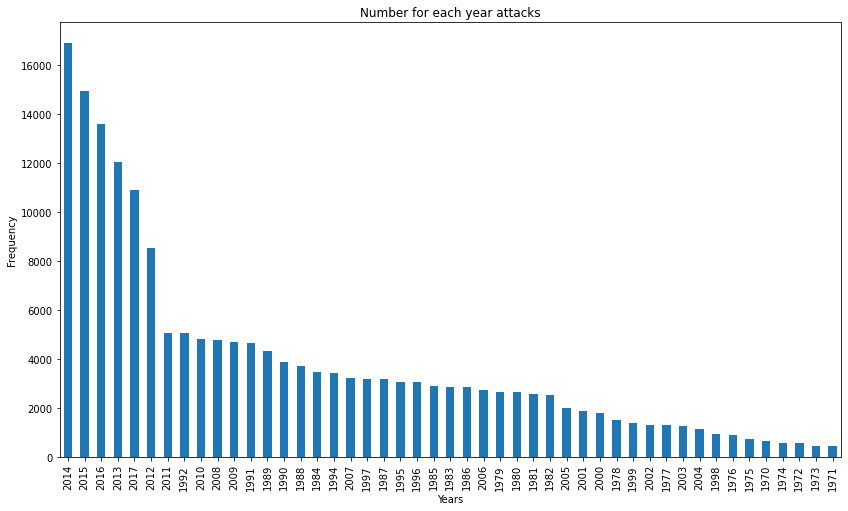

In [ ]:
ax = global_terrorism['Year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each year attacks")
ax.set_xlabel("Years")
ax.set_ylabel("Frequency")

1.Initially in the past 1971 the attacks are comparatevly very less.

2.2014 is the Highest Terrorism attack rate.

3.By every Year the attacks are gradually increasing

In [ ]:
global_terrorism.head()


In [ ]:
ax = global_terrorism['Month'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Month attacks")
ax.set_xlabel("Month")
ax.set_ylabel("Frequency")
'''
x=global_terrorism['Month'].value_counts()
plt.pie(global_terrorism, labels= global_terrorism['Month'], autopct='%1.1f%%', explode=[0,0,0,0.1,0], shadow=True, startangle=90)
plt.title('World Energy Consumption')
plt.axis('equal')
plt.show()
global_terrorism.groupby(['Month']).sum().plot(
    kind='pie', y=global_terrorism['Country'], autopct='%1.0f%%')'''

Attacks for each  and every month

In [ ]:
ax = global_terrorism['Country_Name'].value_counts().head(30).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of attcks for each country")
ax.set_xlabel("Country_Names")
ax.set_ylabel("Frequency")


In [ ]:
ax = global_terrorism['Country_Name'].value_counts().tail(30).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of attcks for each country")
ax.set_xlabel("Country_Names")
ax.set_ylabel("Frequency")


Attacks in Each and Every Country


In [ ]:
ax = global_terrorism['Region'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of attacks for each Region")
ax.set_xlabel("Region")
ax.set_ylabel("Frequency")

Attacks in Each and Every region

In [ ]:
global_terrorism['City'].value_counts()

In [ ]:
ax = global_terrorism['City'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number attacks in Each City")
ax.set_xlabel("City")
ax.set_ylabel("Frequency")

In [ ]:
numeric_features = global_terrorism.describe().columns
numeric_features

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = global_terrorism[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [ ]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style = "darkgrid")
xaxis = sns.countplot(x = 'year', data = terror_df)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Terrorist Attack by Year', fontsize = 12)

Above are the univariate bar plots for all the columns of the dataset

***BI VARIATE***

In [ ]:
##plotting using matplotlib

##plt scatter
x=global_terrorism['Year'].value_counts()
y=global_terrorism['Month'].value_counts()
plt.scatter(x,y,c='g')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Graph in 2D')